In [1]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
reviews = pd.read_csv("/Users/akankshaagrawal/Desktop/sentiment-analysis/small_corpus.csv")


In [3]:
reviews.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2770CT2B6TDKI,B000DLB2FI,Trucky,"[0, 2]","I purchased this filter with my Keurig coffee maker, have not used it and probable won't. For the cost of the Keurig coffee maker, which is a great coffee maker, this filter should come with it.",1.0,Not much use,1231632000,"01 11, 2009"
1,A2R6QN0TNC48RY,B00266X5IA,Goddess Arya,"[0, 0]","Floats, even if I'm on it it tries to float and is impossible to actually lie on it comfortably. Threw it out pretty quick &#62;.&#60;",1.0,floats - useless,1386547200,"12 9, 2013"
2,A36D7M4SEM7YQM,B000063CBT,Kimberly Barnhart,"[0, 4]","Finally, when it actually WAS over a year since I had received the coffeemaker, when I called to check on the status of my warranty claim, they said, ""Your warranty has expired. You've had this coffeemaker over one year. There is nothing we can do."" I highly recommend you find a coffeemaker from a manufacturer that stands behind their product! I have a Cuisinart now, and it is WONDERFUL!",1.0,SAVE YOUR MONEY!!!!,1176768000,"04 17, 2007"
3,A35JPD8Q492FJC,B0000CFQ4J,Firefly,"[10, 10]","Like others have said, these burnished beaters can never be washed in the dishwasher. I had no trouble soaking mine in the sink, but one trip through the DW was all it took to ruin it. The really icky part is I used the beater once before noticing that not only did it not shine, but also it was coated with aluminum powder! YUUUUCK!! Unless you are the kind of person who cooks and immediately cleans up by hand, get the coated kind, because KA no longer makes the stainless beaters. This is a good example of the sad deterioration in overall KA quality.",1.0,Horrible,1338595200,"06 2, 2012"
4,A2NX6MFZP8TM6S,B005A32W94,Deanokat,"[5, 6]","The concept of the Ambia ACH-120 Portable Two Zone Ceramic Heater is ingenious. A dual-module heater where one of the modules detaches and can be moved up to 6 feet away from the base unit? What a great idea! The heater also generates a decent amount of heat. But the big problem I have with it is the noise it makes. The fan itself is pretty noisy. And because it has a thermostat that cycles the unit on/off in order to maintain a desired temperature, the unit goes on/off quite frequently. To make matters worse, it's not a gradual on/off, either. It's a very abrupt on; and a very abrupt off. And when it goes on, there's a pretty loud click that accompanies that, too. I haven't owned a lot of ceramic heaters. In fact, I only have one other one. But that one has a fan that gradually slows down/speeds up in order to maintain the desired temperature. That approach is much less annoying, in my opinion. The noise this heater makes when it goes on/off even scares my cats. I really like the concept behind this unit. And it does a decent job of heating up a small room. I just don't like the noise it makes. One last point: It would be nice if this heater had more than just the one fan speed setting. A low/high option would've been a nice feature.UPDATE (2/16/13): This heater has been retired from use because of two reasons. 1.) The right unit only works intermittently now. It became a crap shoot as to whether or not the right side would work every time I turned the heater on. Sometimes it would. Sometimes it wouldn't. I felt like it was unsafe to operate the unit. 2.) My wife discovered that while the heater was running the plug got incredibly hot. Not just warm, but HOT. We never plugged it into an extension cord or power strip; only a grounded wall outlet. But the plug got so hot it was almost too hot to touch. Again, it seemed like a safety issue. We already disliked the very noisy fan and the loud clicking noise it made when it came on. The safety concerns were the last straw. I would recommend staying away from this heater.",1.0,"Nice concept, but kind of noisy. Safety concerns, too.",1317340800,"09 30, 2011"


In [4]:
from nltk.tokenize import TreebankWordTokenizer
from string import punctuation
import string

In [5]:
tb_tokenizer = TreebankWordTokenizer()


In [6]:
#remove punctuation->remove extra spaces->turn to lower case

reviews["rev_text_lower"] = reviews['reviewText'].apply(lambda rev: str(rev)\
                                                        .translate(str.maketrans('', '', punctuation))\
                                                        .replace("<br />", " ")\
                                                        .lower())

In [7]:
reviews[['reviewText','rev_text_lower']].sample(2)


,reviewText,rev_text_lower
1025,"I bought 2 of these because of the great reviews. First off, the only way to install them is a big strip of tape on the back that glues it to the wall. That was okay with me, since I didn't need to screw them into the wall.But I made a mistake after I installed the first one - I watered down a liquid soap and filled the thing TO THE TOP because I'd studied out the whole ""make your own foam"" thing & thought it would work. After I put it in, it not only didn't ""foam,"" it dripped. I dug the little paper out of the box and read the very small print & it said it wouldn't work for foam. Okay. I stuck a little bowl under it & we scoop it out of the bowl.Then I stuck the 2nd one next to our kitchen sink & filled it with liquid dish soap. It drips. So we have a sponge laying under it.I'm really disappointed. I know #1 was my fault, but #2 should work. As soon as they're empty, I'm gonna pry them off & scrape the inevitable tape off of the wall.",i bought 2 of these because of the great reviews first off the only way to install them is a big strip of tape on the back that glues it to the wall that was okay with me since i didnt need to screw them into the wallbut i made a mistake after i installed the first one i watered down a liquid soap and filled the thing to the top because id studied out the whole make your own foam thing thought it would work after i put it in it not only didnt foam it dripped i dug the little paper out of the box and read the very small print it said it wouldnt work for foam okay i stuck a little bowl under it we scoop it out of the bowlthen i stuck the 2nd one next to our kitchen sink filled it with liquid dish soap it drips so we have a sponge laying under itim really disappointed i know 1 was my fault but 2 should work as soon as theyre empty im gonna pry them off scrape the inevitable tape off of the wall
1691,"I wanted to like this drainer. I'm trying to like this drainer. But truth be told, I just don't. It is awkward and I find it difficult to arrange my odd shaped things in this. I hand wash all my dishes, so I have lots everyday, and I really wanted to find a drainer that would accommodate large loads of varying shapes and sizes of dishes, etc... I will use it until I find a better replacement.",i wanted to like this drainer im trying to like this drainer but truth be told i just dont it is awkward and i find it difficult to arrange my odd shaped things in this i hand wash all my dishes so i have lots everyday and i really wanted to find a drainer that would accommodate large loads of varying shapes and sizes of dishes etc i will use it until i find a better replacement


In [8]:
reviews["tb_tokens"] = reviews['rev_text_lower'].apply(lambda rev: tb_tokenizer.tokenize(str(rev)))


In [9]:
#treebank tokenize

In [10]:
reviews["tb_tokens"]

0                                                                                                                                                                                                                                                                                                                                                                                                                              [i, purchased, this, filter, with, my, keurig, coffee, maker, have, not, used, it, and, probable, wont, for, the, cost, of, the, keurig, coffee, maker, which, is, a, great, coffee, maker, this, filter, should, come, with, it]
1                                                                                                                                                                                                                                                                                                                                                                      

In [11]:
pd.set_option('display.max_colwidth', None)


In [12]:
#casual tokenize

In [13]:
from nltk.tokenize.casual import casual_tokenize


In [14]:
reviews['casual_tokens'] = reviews['rev_text_lower'].apply(lambda rev: casual_tokenize(str(rev)))


In [15]:
reviews['casual_tokens']

0                                                                                                                                                                                                                                                                                                                                                                                                                         [i, purchased, this, filter, with, my, keurig, coffee, maker, have, not, used, it, and, probable, wont, for, the, cost, of, the, keurig, coffee, maker, which, is, a, great, coffee, maker, this, filter, should, come, with, it]
1                                                                                                                                                                                                                                                                                                                                                                           

In [16]:
reviews[['casual_tokens','tb_tokens']].sample(3)

,casual_tokens,tb_tokens
471,"[my, husband, and, i, tried, it, on, our, king, size, bed, andathe, newness, scent, never, went, away, after, a, few, weeksit, was, strongbit, felt, like, we, were, sleeping, in, a, hammock, and, we, are, both, small, and, lightcit, made, the, bed, feel, too, spongyguess, it, depends, on, what, youre, used, to, sleeping, on, as, to, whether, or, not, you, would, like, the, feel, of, this, but, as, for, myself, i, would, rather, sleep, on, the, floor, than, to, sleep, on, one, of, these, again]","[my, husband, and, i, tried, it, on, our, king, size, bed, andathe, newness, scent, never, went, away, after, a, few, weeksit, was, strongbit, felt, like, we, were, sleeping, in, a, hammock, and, we, are, both, small, and, lightcit, made, the, bed, feel, too, spongyguess, it, depends, on, what, youre, used, to, sleeping, on, as, to, whether, or, not, you, would, like, the, feel, of, this, but, as, for, myself, i, would, rather, sleep, on, the, floor, than, to, sleep, on, one, of, these, again]"
3313,"[this, was, just, what, i, needed, i, have, an, older, unit, i, restored, and, living, in, the, desert, i, had, no, way, to, no, if, the, gauge, was, correct, or, not, with, this, my, pressure, is, guaranteed, to, be, the, 10, pounds, it, actually, says, on, the, instructions, that, if, you, have, a, dial, gauge, not, to, rely, on, the, gauge, and, trust, the, weight, good, stuff]","[this, was, just, what, i, needed, i, have, an, older, unit, i, restored, and, living, in, the, desert, i, had, no, way, to, no, if, the, gauge, was, correct, or, not, with, this, my, pressure, is, guaranteed, to, be, the, 10, pounds, it, actually, says, on, the, instructions, that, if, you, have, a, dial, gauge, not, to, rely, on, the, gauge, and, trust, the, weight, good, stuff]"
2439,"[this, pan, is, moderately, successful, in, crisping, food, in, a, mw, it, removes, the, slimy, surface, often, found, on, mwed, food, but, it, also, toughens, the, food, my, main, complaint, is, the, odor, the, pan, gives, off, during, cooking, i, believe, it, is, coming, from, the, synthetic, gasket, found, just, under, the, upper, pan, lipok, i, have, now, used, this, pan, for, a, while, and, can, up, my, recommendation, to, a, four, star, the, smell, is, now, gone, and, once, i, determined, the, amount, of, time, needed, for, cooking, the, food, is, much, better, i, can, take, out, a, batch, ...]","[this, pan, is, moderately, successful, in, crisping, food, in, a, mw, it, removes, the, slimy, surface, often, found, on, mwed, food, but, it, also, toughens, the, food, my, main, complaint, is, the, odor, the, pan, gives, off, during, cooking, i, believe, it, is, coming, from, the, synthetic, gasket, found, just, under, the, upper, pan, lipok, i, have, now, used, this, pan, for, a, while, and, can, up, my, recommendation, to, a, four, star, the, smell, is, now, gone, and, once, i, determined, the, amount, of, time, needed, for, cooking, the, food, is, much, better, i, can, take, out, a, batch, ...]"


In [17]:
from nltk.stem.porter import PorterStemmer


In [18]:
stemmer = PorterStemmer()


In [19]:
reviews['tokens_stemmed'] = reviews['tb_tokens'].apply(lambda words: [stemmer.stem(w) for w in words])


In [20]:
reviews[['tb_tokens','tokens_stemmed']].sample(3)


,tb_tokens,tokens_stemmed
4330,"[love, these, towels, for, drying, dishes, and, glasses, mopping, up, the, kitchen, counter, and, when, they, get, really, tired, i, use, them, to, clean, the, windows, or, general, cleaning, at, home, car, and, boat, good, price, too]","[love, these, towel, for, dri, dish, and, glass, mop, up, the, kitchen, counter, and, when, they, get, realli, tire, i, use, them, to, clean, the, window, or, gener, clean, at, home, car, and, boat, good, price, too]"
1102,"[like, other, reviewers, i, tossed, out, our, old, swingaway, opener, after, installing, the, new, one, boy, am, i, sorry, no, matter, how, hard, we, try, the, new, one, will, not, cut, around, a, can, without, several, tries, we, end, up, with, lots, of, sharp, cutting, barbs, and, the, lid, is, still, on, this, was, never, a, problem, with, the, old, one, do, not, be, tricked, into, getting, this, one]","[like, other, review, i, toss, out, our, old, swingaway, open, after, instal, the, new, one, boy, am, i, sorri, no, matter, how, hard, we, tri, the, new, one, will, not, cut, around, a, can, without, sever, tri, we, end, up, with, lot, of, sharp, cut, barb, and, the, lid, is, still, on, thi, wa, never, a, problem, with, the, old, one, do, not, be, trick, into, get, thi, one]"
447,"[came, assembled, with, wire, preassembled, and, thus, obviously, it, was, broken, upon, arrival, one, end, that, has, a, nub, on, it, was, broken, and, the, two, spares, would, not, fit, whatsoever, the, marble, where, the, swing, are, is, bored, still, had, a, ton, of, residue, that, got, all, over, me, when, trying, to, resolve, what, a, pita, disappointed]","[came, assembl, with, wire, preassembl, and, thu, obvious, it, wa, broken, upon, arriv, one, end, that, ha, a, nub, on, it, wa, broken, and, the, two, spare, would, not, fit, whatsoev, the, marbl, where, the, swing, are, is, bore, still, had, a, ton, of, residu, that, got, all, over, me, when, tri, to, resolv, what, a, pita, disappoint]"


In [21]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag


In [22]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [23]:
lemmatizer = WordNetLemmatizer()
def get_lemas(tokens):
    lemmas = []
    for token in tokens:
        pos = penn_to_wn(pos_tag([token])[0][1])
        if pos:
            lemma = lemmatizer.lemmatize(token, pos)
            if lemma:
                lemmas.append(lemma)
    return lemmas

In [24]:
reviews['lemmas'] = reviews['tb_tokens'].apply(lambda tokens: get_lemas(tokens))


In [25]:
reviews[['reviewText','tokens_stemmed','lemmas']].sample(2)


,reviewText,tokens_stemmed,lemmas
1009,"It's a couple of small plastic sleeves that attached to the normal Kitchenaid food grinder attachment, but one of the sleeves arrived in two pieces. It would have taken longer to return than it was worth, but it's one of those little items that cost more to haggle over than they'd cost to replace.","[it, a, coupl, of, small, plastic, sleev, that, attach, to, the, normal, kitchenaid, food, grinder, attach, but, one, of, the, sleev, arriv, in, two, piec, it, would, have, taken, longer, to, return, than, it, wa, worth, but, it, one, of, those, littl, item, that, cost, more, to, haggl, over, than, theyd, cost, to, replac]","[couple, small, plastic, sleeve, attach, normal, kitchenaid, food, grinder, attachment, sleeve, arrive, piece, have, take, longer, return, be, worth, little, item, cost, more, haggle, theyd, cost, replace]"
3584,.I use this fan in the bedroom to move the air about. I really helps to keep my room cooler and I like the air movement that I can feel - I sleep better.,"[i, use, thi, fan, in, the, bedroom, to, move, the, air, about, i, realli, help, to, keep, my, room, cooler, and, i, like, the, air, movement, that, i, can, feel, i, sleep, better]","[i, use, fan, bedroom, move, air, i, really, help, keep, room, cooler, i, air, movement, i, feel, i, sleep, well]"


In [26]:
swn.senti_synset(wn.synsets("WELL", wn.ADJ)[0].name()).pos_score()


0.75

In [27]:
def get_sentiment_score(tokens):
    score = 0
    tags = pos_tag(tokens)
    
    for word, tag in tags:
        wn_tag = penn_to_wn(tag)
        if not wn_tag:
            continue
        synsets = wn.synsets(word, pos=wn_tag)
        if not synsets:
            continue
        
        #most common set:
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        
        score += (swn_synset.pos_score() - swn_synset.neg_score())
        
    return score
                    


In [28]:
reviews['sentiment_score'] = reviews['lemmas'].apply(lambda tokens: get_sentiment_score(tokens))



In [29]:
reviews[['reviewText','lemmas','sentiment_score']].sample(5)


,reviewText,lemmas,sentiment_score
1715,"Thin and not as firm as you would think with ""memory foam."" this foam only has memory because it goes back into place. It's about as thin as an egg crate from Walmart. Very unsatisfied. I am probably going to return this one and get another brand with 2X the thickness AT LEAST.","[thin, not, firm, think, memory, foam, foam, only, have, memory, go, back, place, thin, egg, crate, walmart, very, unsatisfied, i, be, probably, go, return, get, brand, thickness, least]",-0.500
1700,"Really not all that pleased with this, it's just very flimsy feeling. The glass is very thin, and the mug itself is huge - the picture with that one tea bag in it is totally misleading - you'd need 2-3 if you filled the water up that high. The silicone top feels like super thin, cheesy rubber - it's currently sitting in the back of my cabinet, haven't even bothered to use it it's just very impractical and I fear it would shatter in the dishwasher.","[really, not, pleased, just, very, flimsy, feel, glass, be, very, thin, mug, be, huge, picture, tea, bag, be, totally, mislead, youd, need, fill, water, up, high, silicone, top, feel, super, thin, cheesy, rubber, currently, sit, back, cabinet, havent, even, bother, use, just, very, impractical, i, fear, shatter, dishwasher]",-0.125
2743,"These are good griddles. I do not know of any waffle maker that makes them crisp. First off, the waffles come out brown and slightly crisp. I will be using the highest setting and a longer baking time, the next time and PLEASE use your best waffle recipe, not the one that came in the booklet. Then if need be I will just pop them in the toaster and they will be great. Will post a followup...","[be, good, griddle, i, do, not, know, waffle, maker, make, crisp, first, waffle, come, brown, slightly, crisp, i, be, use, high, set, longer, baking, time, next, time, please, use, best, waffle, recipe, not, come, booklet, then, need, be, i, just, pop, toaster, be, great, post, followup]",0.375
2902,"This is a good product that definitely saves a little bit of money, but the coffee can sometimes be a bit hard to rinse out. Altogether, a good product.","[be, good, product, definitely, save, little, bit, money, coffee, sometimes, be, bit, hard, rinse, altogether, good, product]",1.250
3863,"June 6, 2012 UpdateJust a quick note regarding this knife. It has been two years and the Pinzon is my ""go to knife"" for most of the kitchen work I do. It performs perfectly for slicing meats sandwich thin. The blade has withstood many cuts and remains as sharp today as when originally opened. I use the steel on it before I begin and after three or four swipes it is ready for whatever I hit it with. Still a top quality blade for a super good price.At first glance I was underwhelmed but I was wrong by a long shot. When I opened the meager package my expectations were less than normal. The knife itself was minimal at best but that was before a closer inspection. Having all the attributes of an American I did not read the instructions first. There were none. But, as it turns out, I needed none. I checked the blade and handle for defects. None. I checked the blade's edge for sharpness. It was dull or at least I thought so until I used it.After washing it off with sudsy soap (redundant?) and water, rinsing well and drying, I put it to the tests. I started with a hot turkey breast. Hot is more difficult to cut thin slices than cold. This cut the breast with ease and the pieces were quite thin. I subsequently cut the breast while it was cold and the slices were much thinner than all the other knives I have in my arsenal. Can one have a knife in an arsenal?In between I cut veggies and they were a snap and completed with ease. Try it, you'll like it. Then came the beef. Slicing a 4 pound rump roast was slick as cutting butter. Really! I especially like the thinness of the blade. Unlike many santoku blades this one does not have the little ridges (I know they have names

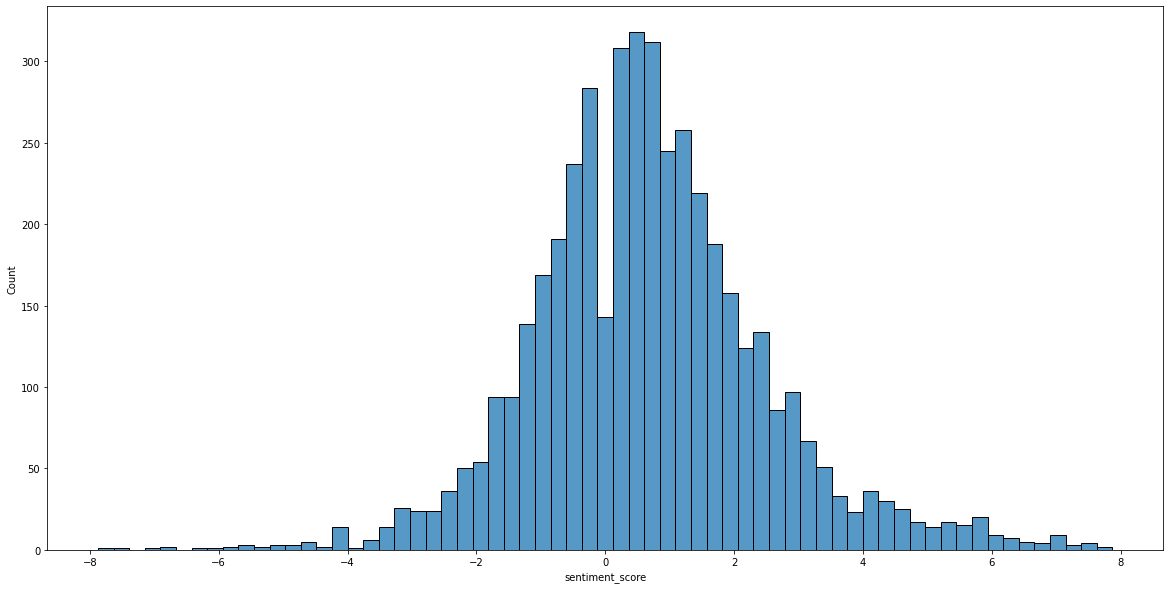

In [30]:
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='sentiment_score', data=reviews.query("sentiment_score < 8 and sentiment_score > -8"), ax=ax)
plt.show()

In [31]:
reviews['sentiment'] = reviews['sentiment_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))


In [32]:
reviews['sentiment'].value_counts(dropna=False)


negative    2090
positive    1688
neutral      722
Name: sentiment, dtype: int64

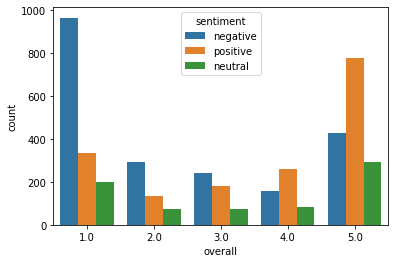

In [33]:
sns.countplot(x='overall', hue='sentiment' ,data = reviews)


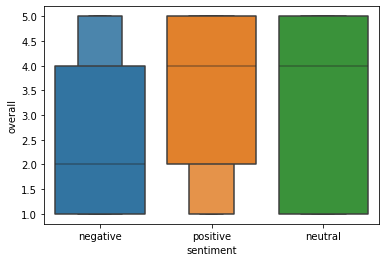

In [34]:
sns.boxenplot(x='sentiment', y='overall', data = reviews)


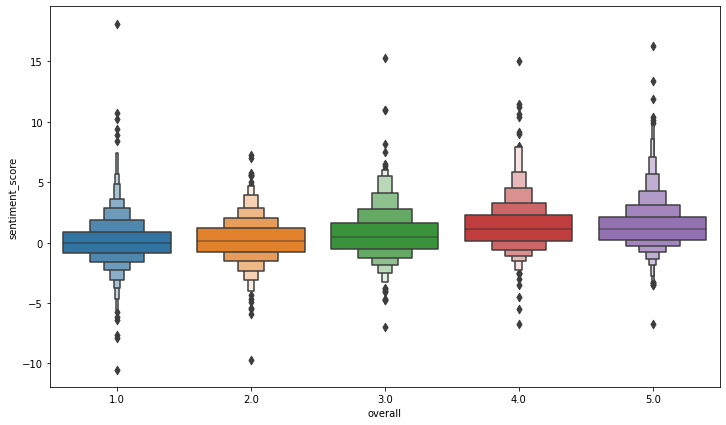

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='sentiment_score', data = reviews, ax=ax)
plt.show()

In [36]:
reviews['true_sentiment'] = \
    reviews['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [37]:
y_pred, y_true = reviews['sentiment'].dropna().tolist(), reviews['true_sentiment'].dropna().tolist()


In [38]:
len(y_pred), len(y_true)


(4500, 4500)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

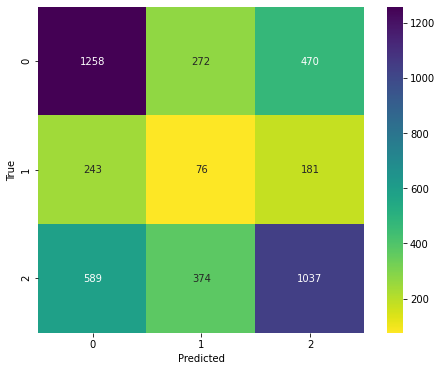

In [40]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

In [41]:
#NEGATIVE SENTIMENT ANALYSIS 

In [42]:
(1258+76+1037)/4500


0.5268888888888889

In [87]:
tp, tn, fp, fn = 1258, 1037+76+181+374,272+470, 243+589


In [88]:
neg_accuracy=(tp+tn)/(tp+fp+tn+fn)


In [89]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)


In [90]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))


recall: 0.6019138755980862
precission: 0.629
f1 score: 0.615158924205379


In [91]:
#POSITIVE SENTIMENT ANALYSIS

In [92]:
tp, tn, fp, fn = 1037, 1258+272+243+76, 181+470, 589+374


In [93]:
pos_accuracy=(tp+tn)/(tp+fp+tn+fn)


In [97]:

print((neg_accuracy+pos_accuracy)/2)

0.6457777777777778


In [48]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [49]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))


recall: 0.5185
precission: 0.6143364928909952
f1 score: 0.5623644251626898


In [50]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize


In [51]:
nltk.download("opinion_lexicon")

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/akankshaagrawal/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [52]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [53]:
pos_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [54]:
def get_sentiment_score_oplex(text):
    
    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0

    raw_sentences = sent_tokenize(text)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))

    
    return total_score

In [55]:
reviews['oplex_sentiment_score'] = reviews['reviewText'].apply(lambda x: get_sentiment_score_oplex(str(x)))


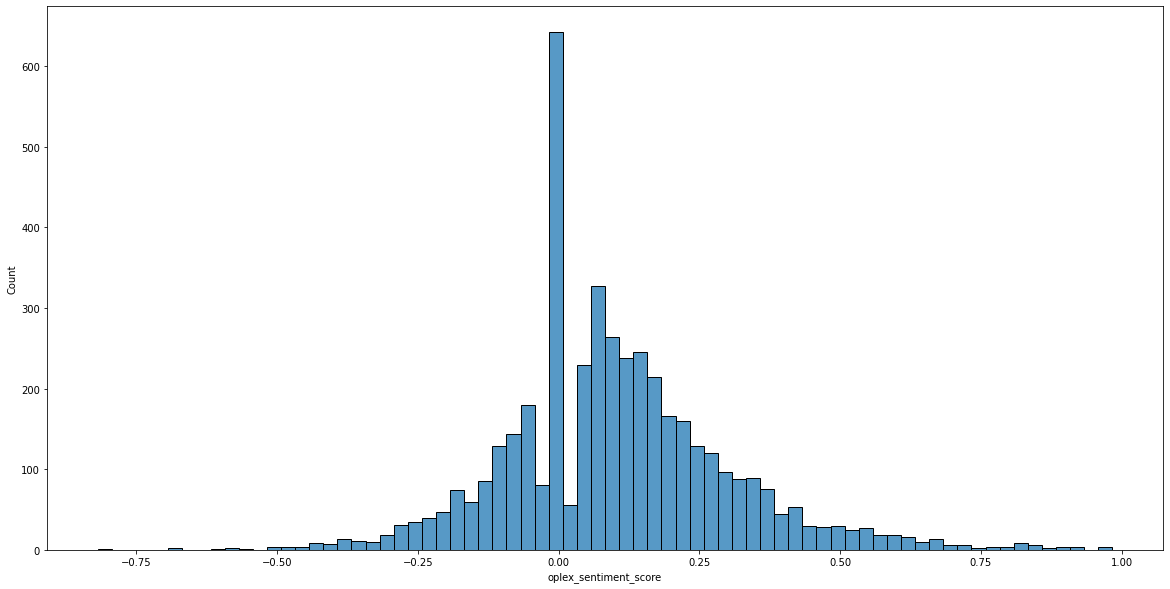

In [56]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='oplex_sentiment_score',\
             data=reviews.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()

In [57]:
reviews['oplex_sentiment'] = \
    reviews['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))


In [58]:
reviews['oplex_sentiment'].value_counts(dropna=False)


positive    2062
neutral     1442
negative     996
Name: oplex_sentiment, dtype: int64

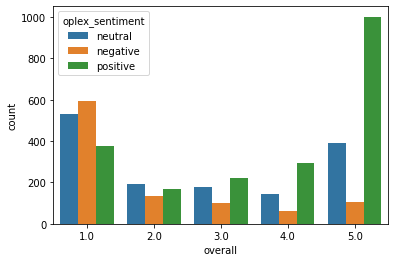

In [59]:
sns.countplot(x='overall', hue='oplex_sentiment' ,data = reviews)


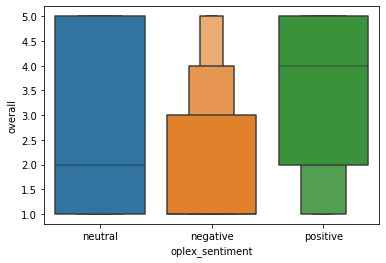

In [60]:
sns.boxenplot(x='oplex_sentiment', y='overall', data = reviews)


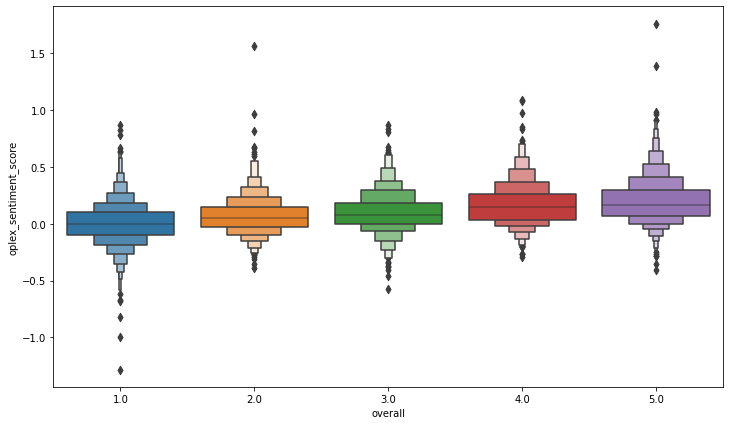

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='oplex_sentiment_score', data = reviews, ax=ax)
plt.show()


In [62]:
y_oplex_pred = reviews['oplex_sentiment'].tolist()


In [63]:
oplex_cm = confusion_matrix(y_true, y_oplex_pred)


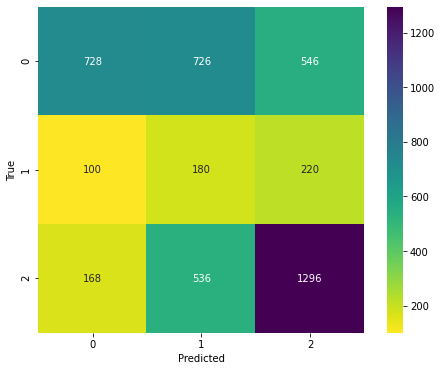

In [64]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

In [65]:
oplex_cm = list(oplex_cm.ravel())


In [66]:
oplex_cm


[728, 726, 546, 100, 180, 220, 168, 536, 1296]

In [67]:
#NEGATIVE ASSESMENT

In [68]:
tp, tn, fp, fn = 728, 1296+536+220+180, 726+546, 100

In [69]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.8792270531400966
precission: 0.364
f1 score: 0.5148514851485149


In [70]:
#Positive Label Assessment

In [71]:
tp, tn, fp, fn = 1296, 180+220+546+726, 546+726, 536+168


In [72]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.648
precission: 0.5046728971962616
f1 score: 0.5674255691768827
